In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("darkgrid")

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
 # Set figure width to 20 and height to 10
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [7]:
# Importing and reading movie database and storing it in movies variable
df = pd.read_csv("C:/Users/risjoshi/Downloads/Education documents/UpGrad Data Science/Course/Course 2/Uber assignment/Uber Request Data.csv")

In [8]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [9]:
#Data cleaning (Includes converting dates to timestamp and I am not removing any row where Driver id or Drop timestamp was null)
#For no cars available Driver id will be null while for cancelled drop timestamp wil be null so removing them will lead to loss of useful data)

#Converting Request timestamp to timestamp
df['Request timestamp derived'] = pd.to_datetime(df['Request timestamp'])

In [10]:
#Deriving Request hour colum using Request timestamp column
df['Request hour']=df['Request timestamp derived'].dt.hour

In [11]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp derived,Request hour
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,11
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,17
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,9
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,21
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,8


In [12]:
#Deriving time_slot column
df['time slot'] = pd.cut(df['Request hour'], [0,6,12,18,24], labels=["Late Night", "Morning", "Noon","Late Evening"],right=False)

In [13]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp derived,Request hour,time slot
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,11,Morning
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,17,Noon
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,9,Morning
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,21,Late Evening
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,8,Morning


In [14]:
#Creating dataframe for status
g = df.groupby( ['Status'] ).size().reset_index(name='count')
x = g['Status']
y = g['count']

In [15]:
g

,Status,count
0,Cancelled,1264
1,No Cars Available,2650
2,Trip Completed,2831


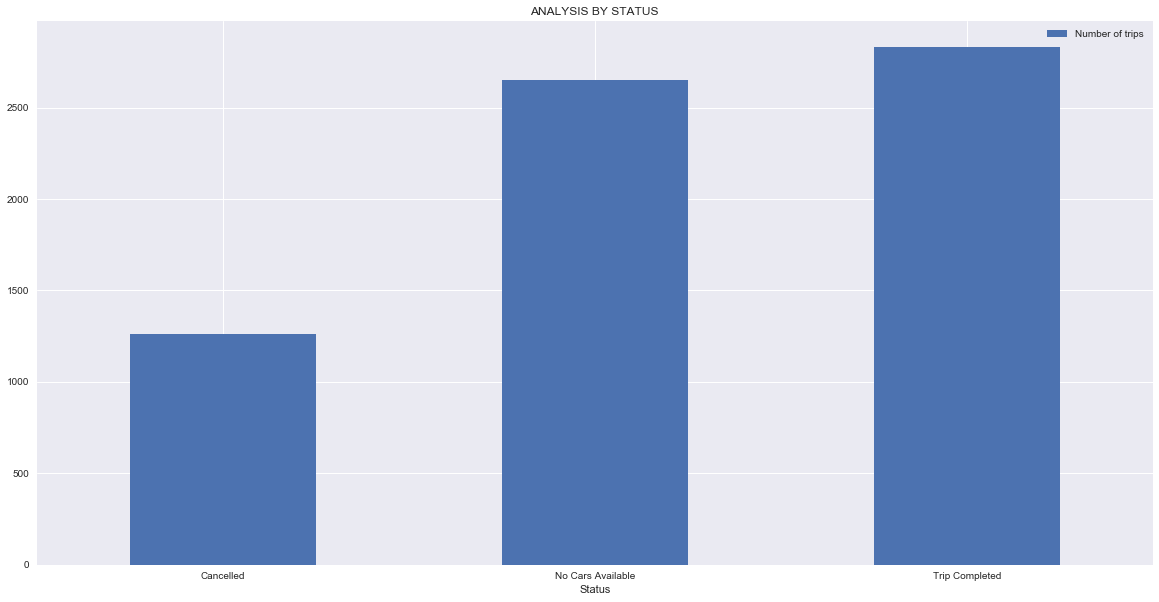

In [16]:
#Creating plot for status
ax = g.plot.bar(label = 'Number of trips', title = 'ANALYSIS BY STATUS', x='Status', y='count', rot=0)
plt.show()

In [17]:
#Creating dataframe for status and pickup point
g1 = df.groupby( ['Status','Pickup point'] ).size().reset_index(name='count')

In [18]:
g1

,Status,Pickup point,count
0,Cancelled,Airport,198
1,Cancelled,City,1066
2,No Cars Available,Airport,1713
3,No Cars Available,City,937
4,Trip Completed,Airport,1327
5,Trip Completed,City,1504


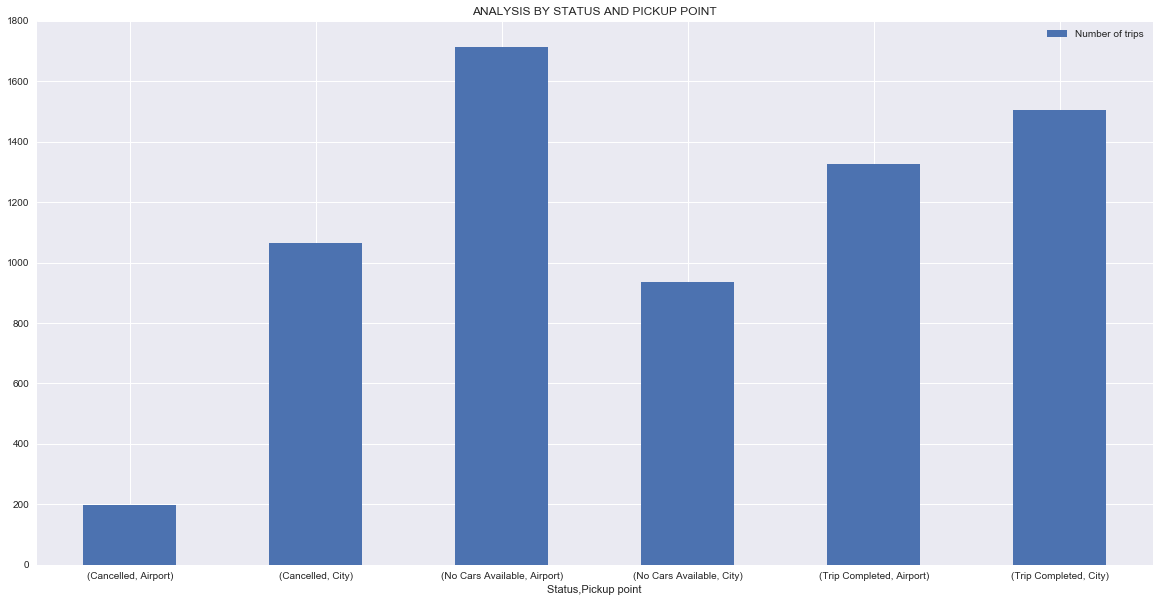

In [19]:
#Creating plot for status and pickup point
ax = g1.plot.bar(label = 'Number of trips', title = 'ANALYSIS BY STATUS AND PICKUP POINT', x=['Status','Pickup point'],y='count',rot=0)

plt.show()

In [20]:
#Creating dataframe for time slot and status
g2 = df.groupby( ['time slot','Status'] ).size().reset_index(name='count')

In [21]:
g2

,time slot,Status,count
0,Late Evening,Cancelled,153
1,Late Evening,No Cars Available,1379
2,Late Evening,Trip Completed,890
3,Late Night,Cancelled,241
4,Late Night,No Cars Available,383
5,Late Night,Trip Completed,399
6,Morning,Cancelled,744
7,Morning,No Cars Available,428
8,Morning,Trip Completed,900
9,Noon,Cancelled,126


In [22]:
#Filtering trips having status as Cancelled and No Cars Available
g2 = g2.loc[g2['Status'] != 'Trip Completed']

In [23]:
g2

,time slot,Status,count
0,Late Evening,Cancelled,153
1,Late Evening,No Cars Available,1379
3,Late Night,Cancelled,241
4,Late Night,No Cars Available,383
6,Morning,Cancelled,744
7,Morning,No Cars Available,428
9,Noon,Cancelled,126
10,Noon,No Cars Available,460


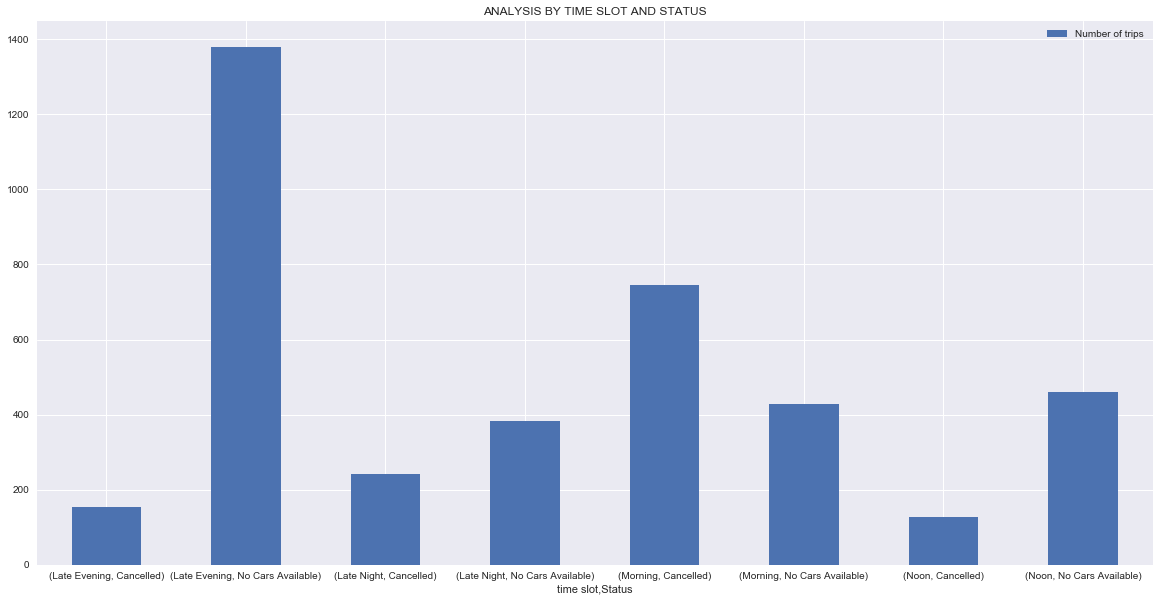

In [24]:
#Creating plot for time slot and status
ax = g2.plot.bar(label = 'Number of trips', title = 'ANALYSIS BY TIME SLOT AND STATUS', x=['time slot','Status'],y='count',rot=0)

plt.show()

In [25]:
#Creating dataframe for pickup point, time slot and status
g3 = df.groupby( ['Pickup point','time slot','Status'] ).size().reset_index(name='count')

In [26]:
g3.head()

,Pickup point,time slot,Status,count
0,Airport,Late Evening,Cancelled,90
1,Airport,Late Evening,No Cars Available,1242
2,Airport,Late Evening,Trip Completed,441
3,Airport,Late Night,Cancelled,6
4,Airport,Late Night,No Cars Available,151


In [27]:
#Filtering trips having time slot as Late Evening and status as No Cars Available and slot as Morning and status as Cancelled
g3 = g3.loc[((g3['time slot'] == 'Late Evening') & (g3['Status'] == 'No Cars Available'))|((g3['time slot'] == 'Morning') & (g3['Status'] == 'Cancelled'))]

In [28]:
g3

,Pickup point,time slot,Status,count
1,Airport,Late Evening,No Cars Available,1242
6,Airport,Morning,Cancelled,33
13,City,Late Evening,No Cars Available,137
18,City,Morning,Cancelled,711


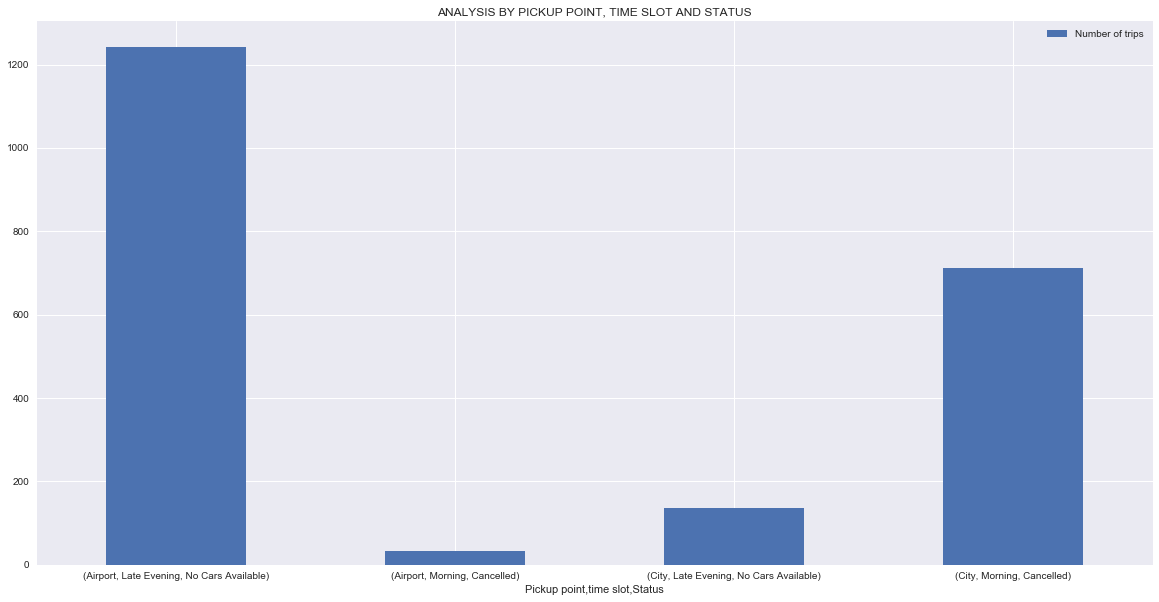

In [29]:
#Creating plot for pickup point, time slot and status
ax = g3.plot.bar(label = 'Number of trips', title = 'ANALYSIS BY PICKUP POINT, TIME SLOT AND STATUS',x=['Pickup point','time slot','Status'],y='count',rot=0)
plt.show()